There are 9568 rows and 5 columns in this dataset.
The rows represent the number of observations and the columns represent the variables.
From the pairplots, we can see that there is not statistically significant association between AP, RH and PE.


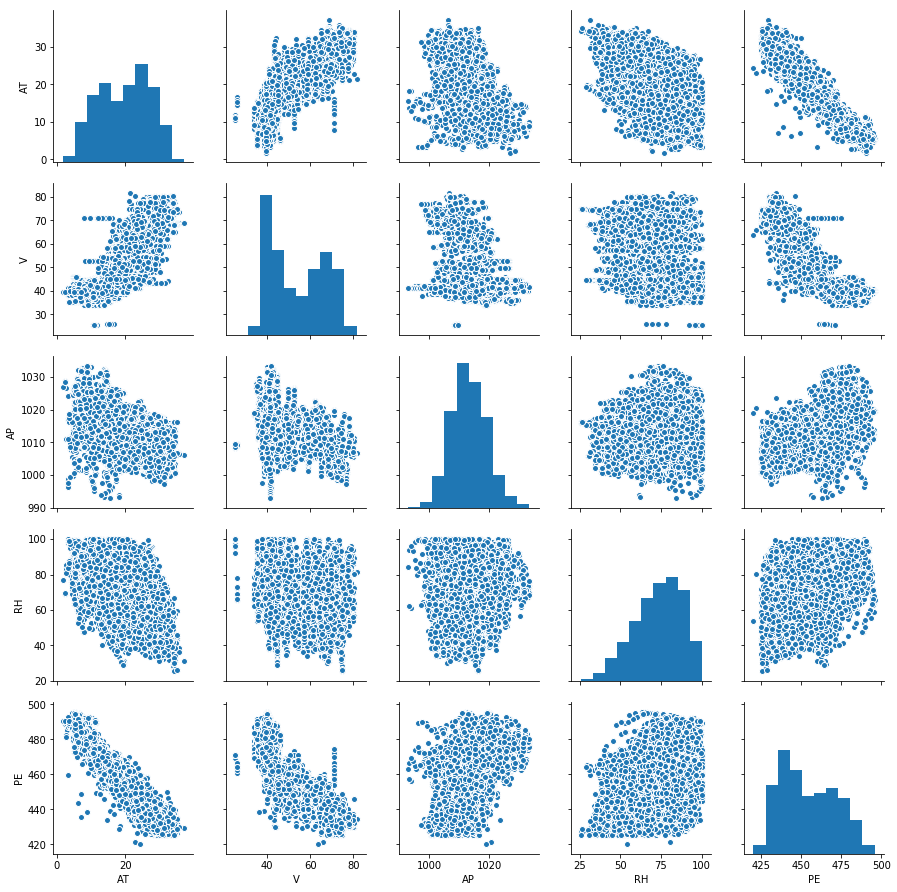

In [4]:
# Make pairwise scatterplots
import pandas as pd
import seaborn as sns

dataFrame = pd.read_csv('Sheet1-Table 1.csv')
# print(dataFrame)
print('There are %d ' % dataFrame.shape[0] + 'rows and %d ' % dataFrame.shape[1] + 'columns in this dataset.')
print('The rows represent the number of observations and the columns represent the variables.')
sns.pairplot(dataFrame)

# Finding
print('From the pairplots, we can see that there is not statistically significant association between AP, RH and PE.')


In [2]:
#Summarize the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset in a table

mean = dataFrame.T.mean(axis=1)
median = dataFrame.T.median(axis=1)
d_range = dataFrame.T.max(axis=1) - dataFrame.T.min(axis=1)
first_qt = dataFrame.T.quantile(q=0.25, axis=1)
third_qt = dataFrame.T.quantile(q=0.75, axis=1)
interq_ranges = dataFrame.T.quantile(q=0.75, axis=1) - dataFrame.T.quantile(q=0.25, axis=1)

df = pd.concat([mean, median, d_range, first_qt, third_qt, interq_ranges], axis=1)
df.columns = ['mean', 'median', 'range', 'first quartiles', 'third quartiles', 'interquartile ranges']
summary_table = df.T.round(3)
summary_table

,AT,V,AP,RH,PE
mean,19.651,54.306,1013.259,73.309,454.365
median,20.345,52.080,1012.940,74.975,451.550
range,35.300,56.200,40.410,74.600,75.500
first quartiles,13.510,41.740,1009.100,63.328,439.750
third quartiles,25.720,66.540,1017.260,84.830,468.430
interquartile ranges,12.210,24.800,8.160,21.502,28.680


AT    0.0
dtype: float64
V    0.0
dtype: float64
AP    0.0
dtype: float64
RH    0.0
dtype: float64


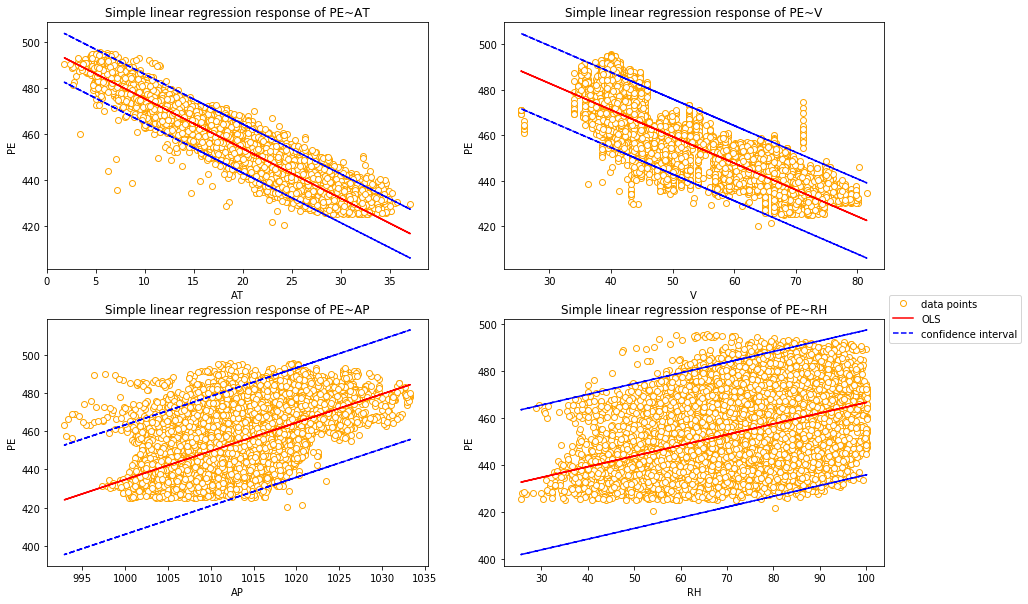

According to the p-values, there is a statistically significant association between the predictor and the response in all the four models.
From these plots, we can see that there is a statistically significant association in all the four models.
There are outliers I want to remove from the data in each of the model. The outliers are the observations away from the confidence interval shown in the plots.


In [3]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

# Fit simple linear regression model of each predictor

predictors = ['AT', 'V', 'AP', 'RH']
formulas = ['PE ~ AT', 'PE ~ V', 'PE ~ AP', 'PE ~ RH']
coef = []
plt.figure(figsize=(15,10))
for i in [0,1,2,3]:
        model = ols(formula=formulas[i], data=dataFrame).fit()
        # print(model.summary())
        print(model.pvalues[1:])
        # coef represents univariate regression coefficients
        coef.append(model.params[1])

        _, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model)
        plt.subplot(2,2,i+1)

        x = dataFrame[predictors[i]]
        y = dataFrame['PE']
        # Plot data points
        plt.plot(x, y, 'o', color='orange', markerfacecolor='white', label='data points')
        # Plot the trend line
        plt.plot(x, model.fittedvalues, color='r', label='OLS')
        # Plot upper and lower confidence intervals
        plt.plot(x, confidence_interval_lower, 'b--', label='confidence interval')
        plt.plot(x, confidence_interval_upper, 'b--')
        plt.xlabel(predictors[i])
        plt.ylabel('PE')
        plt.title('Simple linear regression response of PE~' + predictors[i])
        
plt.legend(bbox_to_anchor=(1,1), loc='center left')
plt.show()
print('According to the p-values, there is a statistically significant association between the predictor and the response in all the four models.')
# print(coef)

# Finding
print('From these plots, we can see that there is a statistically significant association in all the four models.')
print('There are outliers I want to remove from the data in each of the model. The outliers are the observations away from the confidence interval shown in the plots.')

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
model = ols(formula='PE ~ AT+V+AP+RH', data=dataFrame).fit()

#coef1 represents multiple regression coefficients
df = model.params[1:]
#convert dataframe to list
coef1 = np.array(df).tolist()
# print(coef1)

# print(model.summary())
print(model.pvalues[1:])

# Describe the results
print('In multiple regression model using all of the predictors, we can see that all the predictors are significant due to their p<0.5. For all of the predictors, we can reject the null hypothesis H0.')

AT     0.000000e+00
V     4.375305e-215
AP     5.507109e-11
RH    3.104584e-293
dtype: float64
In multiple regression model using all of the predictors, we can see that all the predictors are significant due to their p<0.5. For all of the predictors, we can reject the null hypothesis H0.


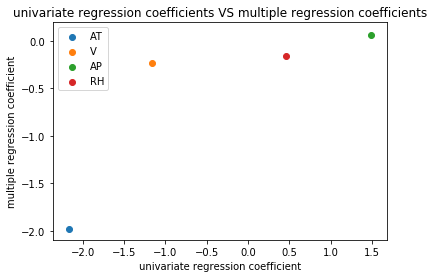

In [6]:
# A plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis
for i in [0,1,2,3]:
        plt.scatter(coef[i], coef1[i], label=predictors[i])
plt.title('univariate regression coefficients VS multiple regression coefficients')
plt.xlabel('univariate regression coefficient')
plt.ylabel('multiple regression coefficient')
plt.legend(loc='best')
plt.show()

In [64]:
#Fit nonlinear regression models for each predictor
df_square = dataFrame**2
df_square.columns = ['AT2', 'V2', 'AP2', 'RH2', 'PE2']
df_cube = dataFrame**3
df_cube.columns = ['AT3', 'V3', 'AP3', 'RH3', 'PE3']
df = pd.concat([dataFrame, df_square, df_cube], axis=1)
# print(df)
nlinear_formulas = ['PE ~ AT + AT2 + AT3', 'PE ~ V + V2 + V3', 'PE ~ AP + AP2+ AP3', 'PE ~ RH + RH2 + RH3']
for i in [0,1,2,3]:
        model = ols(formula=nlinear_formulas[i], data=df).fit()
        model.summary()
        print(model.pvalues[1:].round(6))
        
print('From the results of nonlinear regression models for each predictor, we can see that there is evidence of nonlinear association between AT, V, AP, RH and the response separately. ')

AT     0.000001
AT2    0.000000
AT3    0.000000
dtype: float64
V     0.000025
V2    0.768497
V3    0.013735
dtype: float64
AP     0.0
AP2    0.0
AP3    0.0
dtype: float64
RH     0.000377
RH2    0.000009
RH3    0.000014
dtype: float64
From the results of nonlinear regression models for each predictor, we can see that there is evidence of nonlinear association between AT, V, AP, RH and the response separately. 


In [63]:
#fit a full linear regression model with all pairwise interaction terms
model = ols(formula='PE ~ AT*V + AT*AP + AT*RH +V*AP + V*RH + AP*RH', data=dataFrame).fit()
print(model.summary())

print('There is evidence of association of interactions of predictors with the response.')
print('According to p-values of each term in the full linear regression model with all pairwise interaction terms, interaction terms AT*V, AT*RH, V*AP, AP*RH are statistically significant.')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [65]:
# Split train and test sets, where training set is a randomly selected 70% subset of the data with all predictors and test set is the remaining points
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
df2 = pd.concat([dataFrame, df_square], axis=1)
# print(df2.head())
X_train, X_test, y_train, y_test = train_test_split(df2[['AT', 'V', 'AP', 'RH', 'AT2', 'V2', 'AP2', 'RH2']], df2['PE'], test_size = 0.3, random_state=1)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
# train_df=df2.iloc[0:6697,:]
# test_df=df2.iloc[6697:,:]

#Train a regression model with all predictors on a randomly selected 70% subset of the data, and test on the rest
model = ols(formula='PE ~ AT+V+AP+RH', data=train_df).fit()
print(model.summary())
# Calculate train and test MSEs of the model
print('Train MSE of the regression model with all predictors is: %.6f' % mean_squared_error(train_df['PE'], model.predict(train_df)))
print('Test MSE of the regression model with all predictors is: %.6f' % mean_squared_error(test_df['PE'], model.predict(test_df)))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:26:41   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.3988     11.562     39.649      0.0

In [67]:
#Train and test a regression model with all predictors, interaction terms and quadratic nonlinearities
model = ols(formula='PE ~ AT+AT2+V+V2+AP+AP2+RH+RH2+ AT*V + AT*AP + AT*RH +V*AP + V*RH + AP*RH', data=train_df).fit()
# print(model.summary())
print(model.pvalues[1:].round(6))
print('We can improve the model by removing insignificant variables: AT, V2, AT*AP, V*AP, V*RH')
print('So, the model will become PE ~ AT2 + V+ AP + AP2 + RH + RH2 + AT:V + AT*RH + AP*RH')
print('Train MSE of the regression model with all predictors, interaction terms and quadratic nonlinearities is: %.6f' % mean_squared_error(train_df['PE'], model.predict(train_df)))
print('Test MSE of the regression model with all predictors, interaction terms and quadratic nonlinearities is: %.6f' % mean_squared_error(test_df['PE'], model.predict(test_df)))

# New model after removing insignificant variables
model = ols(formula='PE ~ AT2 + V+ AP + AP2 + RH + RH2 + AT:V + AT*RH + AP*RH', data=train_df).fit()
print(model.pvalues[1:].round(6))
# Calculate train and test MSEs of the model
print('Train MSE of the new model after removing insignificant variables is: %.6f' % mean_squared_error(train_df['PE'], model.predict(train_df)))
print('Test MSE of the New model after removing insignificant variables is: %.6f' % mean_squared_error(test_df['PE'], model.predict(test_df)))

AT       0.301052
AT2      0.000014
V        0.037466
V2       0.312410
AP       0.000000
AP2      0.000000
RH       0.000006
RH2      0.000000
AT:V     0.000224
AT:AP    0.730882
AT:RH    0.000251
V:AP     0.065201
V:RH     0.535398
AP:RH    0.000014
dtype: float64
We can improve the model by removing insignificant variables: AT, V2, AT*AP, V*AP, V*RH
So, the model will become PE ~ AT2 + V+ AP + AP2 + RH + RH2 + AT:V + AT*RH + AP*RH
Train MSE of the regression model with all predictors, interaction terms and quadratic nonlinearities is: 18.059887
Test MSE of the regression model with all predictors, interaction terms and quadratic nonlinearities is: 18.217101
AT2      0.0
V        0.0
AP       0.0
AP2      0.0
RH       0.0
RH2      0.0
AT:V     0.0
AT       0.0
AT:RH    0.0
AP:RH    0.0
dtype: float64
Train MSE of the new model after removing insignificant variables is: 18.093236
Test MSE of the New model after removing insignificant variables is: 18.263588


The optimal number of neighbors k is 5 which gives the best fit of k-nearest neighbor regression using raw features.
The minimal test error is 15.704821


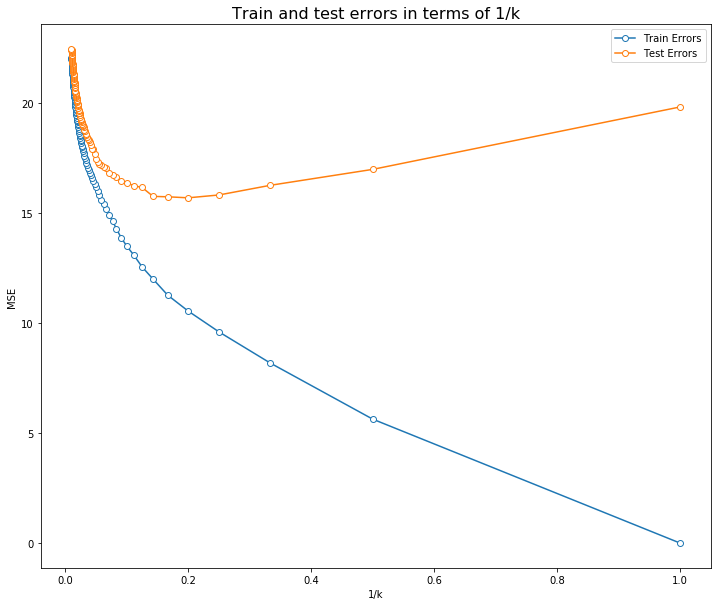

In [59]:
# Fit KNN regression model using raw features
from sklearn.neighbors import KNeighborsRegressor

x_train = train_df[predictors]
y_train = train_df['PE']
x_test = test_df[predictors]
y_test = test_df['PE']

train_error = []
test_error = []
k_range = np.arange(1, 101)
# print(k_range)
for i in k_range:
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_train, y_train)
    train_error.append(mean_squared_error(y_train, knr.predict(x_train)))
    test_error.append(mean_squared_error(y_test, knr.predict(x_test)))
    
# determining best k
optimal_k = k_range[test_error.index(min(test_error))]
print('The optimal number of neighbors k is %d' % optimal_k + ' which gives the best fit of k-nearest neighbor regression using raw features.')
print('The minimal test error is %.6f' % min(test_error))

# Plot the train and test errors in terms of 1/k
plt.figure(figsize=(12,10))
plt.title('Train and test errors in terms of 1/k', fontsize=16)
plt.plot(1/(k_range), train_error, '-o', markerfacecolor='white', label='Train Errors')
plt.plot(1/(k_range), test_error, '-o', markerfacecolor='white', label='Test Errors')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

The optimal number of neighbors k is 8 which gives the best fit of k-nearest neighbor regression using normalized features.
The minimal test error is 17.272750


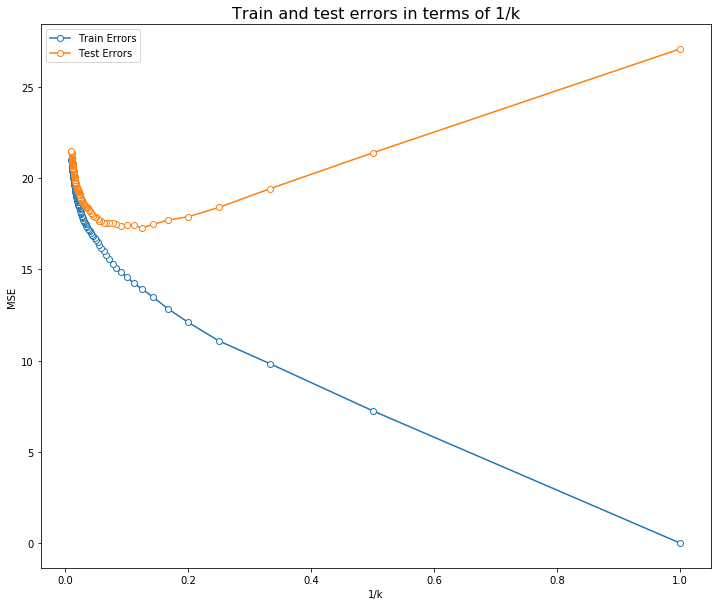

In [60]:
# Fit KNN regression model using normalized features
from sklearn.preprocessing import normalize
x_nom_train = normalize(train_df[predictors])
x_nom_test = normalize(test_df[predictors])
train_error1 = []
test_error1 = []
for i in k_range:
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(x_nom_train, y_train)
    train_error1.append(mean_squared_error(y_train, knr.predict(x_nom_train)))
    test_error1.append(mean_squared_error(y_test, knr.predict(x_nom_test)))
    
# determining best k
optimal_k = k_range[test_error1.index(min(test_error1))]
min_MSE_nom_knr = min(test_error1)
print("The optimal number of neighbors k is %d" % optimal_k + ' which gives the best fit of k-nearest neighbor regression using normalized features.')
print('The minimal test error is %.6f' % min_MSE_nom_knr)
     
# Plot the train and test errors in terms of 1/k
plt.figure(figsize=(12,10))
plt.title('Train and test errors in terms of 1/k', fontsize=16)
plt.plot(1/(k_range), train_error1, '-o', markerfacecolor='white', label='Train Errors')
plt.plot(1/(k_range), test_error1, '-o', markerfacecolor='white', label='Test Errors')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

In [69]:
# Compare the results of KNN Regression with linear regression and provide analysis
print('According to the experiments above, we can see that the results of KNN regression are better than linear regression in terms of MSE.')
print('Linear regression model has to satisfy the assumption that there is linear association between each independent variable (predictor) and the response, whereas KNN does not have to satisfy such assumption. Through our experiment in (f), (g), (h), we found that there exists some nonlinear associations between predictors and response. It rejects the assumption of linear regression model.  This can be attributed to the relatively dispersed data in the dataset. So, linear regression model does not has better performance. ')

According to the experiments above, we can see that the results of KNN regression are better than linear regression in terms of MSE.
Linear regression model has to satisfy the assumption that there is linear association between each independent variable (predictor) and the response, whereas KNN does not have to satisfy such assumption. Through our experiment in (f), (g), (h), we found that there exists some nonlinear associations between predictors and response. It rejects the assumption of linear regression model.  This can be attributed to the relatively dispersed data in the dataset. So, linear regression model does not has better performance. 
